In [1]:
#importing all the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

PCA-reduced dataset shape: (14082, 22)


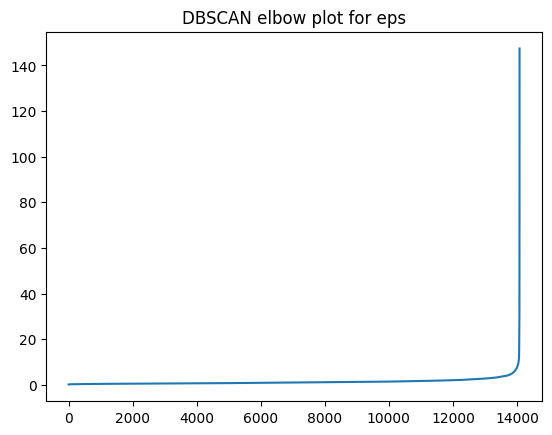

Silhouette (DBSCAN): -0.4727574030280405
{np.int64(-1): np.int64(11112), np.int64(0): np.int64(1311), np.int64(1): np.int64(206), np.int64(2): np.int64(472), np.int64(3): np.int64(5), np.int64(4): np.int64(9), np.int64(5): np.int64(150), np.int64(6): np.int64(39), np.int64(7): np.int64(111), np.int64(8): np.int64(9), np.int64(9): np.int64(30), np.int64(10): np.int64(17), np.int64(11): np.int64(54), np.int64(12): np.int64(15), np.int64(13): np.int64(87), np.int64(14): np.int64(6), np.int64(15): np.int64(15), np.int64(16): np.int64(12), np.int64(17): np.int64(10), np.int64(18): np.int64(5), np.int64(19): np.int64(15), np.int64(20): np.int64(27), np.int64(21): np.int64(6), np.int64(22): np.int64(9), np.int64(23): np.int64(8), np.int64(24): np.int64(11), np.int64(25): np.int64(24), np.int64(26): np.int64(6), np.int64(27): np.int64(7), np.int64(28): np.int64(5), np.int64(29): np.int64(9), np.int64(30): np.int64(7), np.int64(31): np.int64(6), np.int64(32): np.int64(5), np.int64(33): np.int64

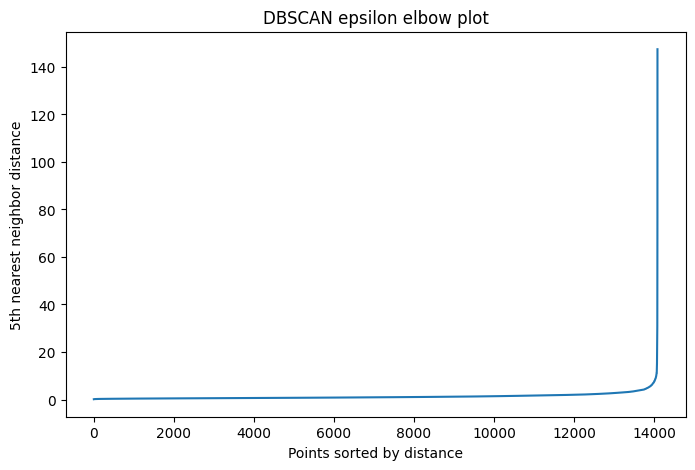

eps=7.590 | clusters=3 | noise=0.36%
Silhouette: 0.451
eps=6.072 | clusters=6 | noise=0.8% | silhouette=0.307
eps=6.831 | clusters=3 | noise=0.6% | silhouette=0.326
eps=7.590 | clusters=3 | noise=0.4% | silhouette=0.451
eps=8.349 | clusters=2 | noise=0.3% | silhouette=0.452
eps=9.107 | clusters=2 | noise=0.2% | silhouette=0.452


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


df = pd.read_csv("./dataset/DM1_game_dataset.csv")
# Select numeric columns and drop missing values
df_num = df.select_dtypes(include=['float64', 'int64']).dropna()

# Scale features (as in the DM1 slides)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)

# Reduce dimensionality with PCA (keep 95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f"PCA-reduced dataset shape: {X_pca.shape}")

#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

#evaluation
from sklearn.metrics import silhouette_score

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform

# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# --- DBSCAN (with distance-based eps tuning) ---
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_pca)
distances, indices = neighbors_fit.kneighbors(X_pca)
distances = np.sort(distances[:,4])
plt.plot(distances)
plt.title("DBSCAN elbow plot for eps")
plt.show()

# Example model
db = DBSCAN(eps=0.5, min_samples=5).fit(X_pca)
print("Silhouette (DBSCAN):", silhouette_score(X_pca, db.labels_))

unique, counts = np.unique(db.labels_, return_counts=True)
cluster_summary = dict(zip(unique, counts))
print(cluster_summary)

# Find the elbow point
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_pca)
distances, indices = neighbors_fit.kneighbors(X_pca)
distances = np.sort(distances[:, 4])

plt.figure(figsize=(8,5))
plt.plot(distances)
plt.title("DBSCAN epsilon elbow plot")
plt.xlabel("Points sorted by distance")
plt.ylabel("5th nearest neighbor distance")
plt.show()

eps_val = distances[14000]   # value at the elbow
db = DBSCAN(eps=eps_val, min_samples=5).fit(X_pca)

labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
noise_ratio = list(labels).count(-1) / len(labels)

print(f"eps={eps_val:.3f} | clusters={n_clusters} | noise={noise_ratio:.2%}")

if n_clusters > 1:
    sil = silhouette_score(X_pca, labels)
    print(f"Silhouette: {sil:.3f}")

for eps in np.linspace(eps_val*0.8, eps_val*1.2, 5):
    db = DBSCAN(eps=eps, min_samples=5).fit(X_pca)
    labels = db.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    noise_ratio = list(labels).count(-1) / len(labels)
    if n_clusters > 1:
        sil = silhouette_score(X_pca, labels)
        print(f"eps={eps:.3f} | clusters={n_clusters} | noise={noise_ratio:.1%} | silhouette={sil:.3f}")

